# LookingDeepLearning

## 학습 목표

* 딥러닝 문제 구성에 대한 기본적인 이해를 높인다.
* Neural Network에 사용되는 용어들에 대한 이해를 높인다.
* 딥러닝 프레임워크를 사용하지 않고, Numpy만을 이용해 딥러닝 모델과 훈련 과정을 직접 구현해 본다.

## MNIST Revisited

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

In [2]:
%load_ext tensorboard
!rm -rf ./logs/

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [3]:
# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

# 모델에 맞게 데이터 가공
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1]*x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1]*x_test_norm.shape[2])

# 딥러닝 모델 구성 - 2 Layer Perceptron
model=keras.models.Sequential()
model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784,)))  # 입력층 d=784, 은닉층 레이어 H=50
model.add(keras.layers.Dense(10, activation='softmax'))   # 출력층 레이어 K=10
model.summary()

# 모델 구성과 학습
logdir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)


model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10, callbacks=[tensorboard_callback])

# 모델 테스트 결과
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))




2022-08-10 14:31:56.456220: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-10 14:31:56.481729: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-10 14:31:56.482072: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-10 14:31:56.482845: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


o
2022-08-10 14:31:56.483913: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-10 14:31:56.484130: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-10 14:31:56.905175: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-10 14:31:56.905344: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-10 14:31:56.905454: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4931 - accuracy: 0.8823
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2320 - accuracy: 0.9348
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1795 - accuracy: 0.9484
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1484 - accuracy: 0.9579
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1266 - accuracy: 0.9641
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1109 - accuracy: 0.9682
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0991 - accuracy: 0.9716
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0887 - accuracy: 0.9752
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0806 - accuracy: 0.9767
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.073

In [4]:
# %tensorboard --logdir logs/fit

* 입력층 데이터의 모양(shape)
* 테스트를 위해 x_train_reshaped의 앞 5개의 데이터를 가져온다.

In [5]:
print(x_train_reshaped.shape)
X = x_train_reshaped[:5]
print(X.shape)

(60000, 784)
(5, 784)


* 인접 레이어간 관계를 나타내는 파라미터 W를 생성하고 random 초기화
* 바이어스 파라미터 b를 생성하고 Zero로 초기화
* 은닉층 크기 출력
* 첫번째 데이터의 은닉층 출력

In [6]:
weight_init_std = 0.1
input_size = 784
hidden_size=50

W1 = weight_init_std * np.random.randn(input_size, hidden_size)  
b1 = np.zeros(hidden_size)

a1 = np.dot(X, W1) + b1

print(W1.shape)
print(b1.shape)
print(a1.shape)
print(a1[0])

(784, 50)
(50,)
(5, 50)
[-0.47784576  1.10640358 -0.25096701 -1.01998469  0.83340601 -2.64149311
  0.01184845  0.62069096  0.37853998 -0.90167759  0.16126369  0.64111818
  0.92129871 -0.86264241  0.91731881 -0.28558099  1.6319632  -3.18740287
 -0.01364552  0.26877589  1.21854878  0.04764121 -0.02048871 -1.33970402
 -1.50831945 -0.99153766  1.07760095  1.43270678 -1.11021532  1.2164688
 -0.65173182  0.3032707  -1.82968603 -0.44704883 -0.21746012 -0.51885228
 -0.97844719 -0.49155896  0.11700412  0.80105014 -0.88569909 -0.37773758
  1.07275948 -0.37974187  0.18048678  0.51406776  1.21267182 -0.32567426
  0.34756025 -1.34242107]


In [7]:
# tf.keras.utils.plot_model(model, to_file='model_shapes.png', show_shapes=True)

## 활성화 함수 (Activation Functions)

### Sigmoid

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  

z1 = sigmoid(a1)
print(z1[0])

[0.38276095 0.75145802 0.4375855  0.26503038 0.69707463 0.06651527
 0.50296208 0.65037568 0.59352092 0.28870588 0.54022878 0.65500618
 0.71530665 0.29678757 0.71449548 0.42908606 0.8364384  0.03964254
 0.49658867 0.56679236 0.77180806 0.51190805 0.494878   0.20755874
 0.18118798 0.27060847 0.74603972 0.80732271 0.24783075 0.77144153
 0.34259938 0.57524187 0.13827568 0.39006266 0.4458482  0.37312065
 0.2732     0.37952638 0.5292177  0.69019907 0.29199818 0.40667268
 0.74512134 0.40618916 0.5449996  0.62575957 0.77077136 0.41929351
 0.58602582 0.2071122 ]


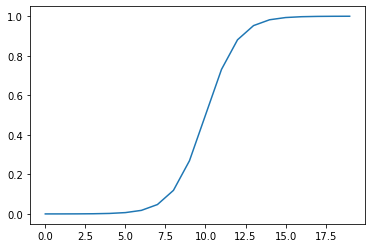

In [9]:
x = np.arange(-10,10)

sns.lineplot(data = sigmoid(x))
plt.show()

* vanishing gradient 현상이 발생한다.(gradient이 너무 작아져서 underflow 현상이 일어남)
* exp 함수 사용 시 비용이 크다.

### TanH

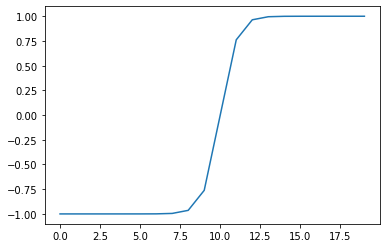

In [10]:
def tanH(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))  

sns.lineplot(data = tanH(x))
plt.show()

* tanh 함수는 함수의 중심값을 0으로 옮겨 sigmoid의 최적화 과정이 느려지는 문제를 해결.
* vanishing gradient 문제 존재.

### ReLU

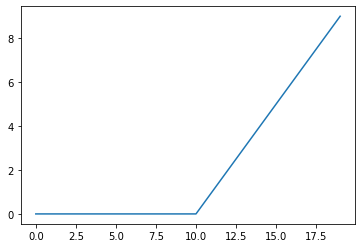

In [11]:
def relu(x):
    return np.where(x >0, x, 0)
    
sns.lineplot(data = relu(x))
plt.show()

* sigmoid, tanh 함수에 비해 학습이 빠름.
* 연산 비용이 크지 않고, 구현이 매우 간단하다.

### Layer 구현

* 단일 레이어 구현 함수

In [12]:
def affine_layer_forward(X, W, b):
    y = np.dot(X, W) + b
    cache = (X, W, b)
    return y, cache

In [13]:
input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)    # z1이 다시 두번째 레이어의 입력이 됩니다. 

print(a2[0])  # 최종 출력이 output_size만큼의 벡터가 되었습니다.
print(a2.shape)

[ 0.35844506  0.25374348 -0.01401344  0.028364   -0.26184895  0.61114209
  0.14337689  0.01049322 -0.1003142  -0.11461655]
(5, 10)


최종 출력에 softmax 함수를 적용해봅시다.

In [14]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [15]:
y_hat = softmax(a2)
y_hat[0]  # 10개의 숫자 중 하나일 확률이 되었습니다.

array([0.12655737, 0.11397671, 0.08720287, 0.09097772, 0.06806082,
       0.16294175, 0.10206681, 0.08936632, 0.07999279, 0.07885684])

## 손실함수 (Loss Functions)

* MSE : 평균 제곱 오차

* 교차 엔트로피
  - cross entropy는 두 확률분포 사이의 유사도가 클수록 작아지는 값

* 정답 라벨을 One-hot 인코딩하는 함수

In [16]:
def _change_one_hot_label(X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T

Y_digit = y_train[:5]
t = _change_one_hot_label(Y_digit, 10)
t     # 정답 라벨의 One-hot 인코딩

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [17]:
print(y_hat[0])
print(t[0])

[0.12655737 0.11397671 0.08720287 0.09097772 0.06806082 0.16294175
 0.10206681 0.08936632 0.07999279 0.07885684]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


아직 예측값과 실제값이 유사하지 않음

* 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환


In [18]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

Loss = cross_entropy_error(y_hat, t)
Loss

2.372628657873207

## 경사하강법 (Gradient Descent)

* 각 단계에서 기울기를 구해 해당 기울기가 가리키는 방향으로 이동

* softmax값의 출력으로 Loss를 미분한 값

In [19]:
batch_num = y_hat.shape[0]
dy = (y_hat - t) / batch_num
dy    

array([[ 0.02531147,  0.02279534,  0.01744057,  0.01819554,  0.01361216,
        -0.16741165,  0.02041336,  0.01787326,  0.01599856,  0.01577137],
       [-0.17351726,  0.02097134,  0.01912187,  0.01610201,  0.01253076,
         0.03647264,  0.02138998,  0.01560263,  0.01730018,  0.01402585],
       [ 0.03017295,  0.01919795,  0.0216294 ,  0.01975189, -0.18830937,
         0.02948602,  0.02147544,  0.01465586,  0.01864436,  0.01329551],
       [ 0.02667822, -0.17921843,  0.01739612,  0.02156818,  0.0113224 ,
         0.03510969,  0.02093723,  0.01665065,  0.01523675,  0.01431918],
       [ 0.025013  ,  0.02084698,  0.02093087,  0.017032  ,  0.01274469,
         0.02897506,  0.02876853,  0.01795504,  0.0169813 , -0.18924747]])

In [20]:
dW2 = np.dot(z1.T, dy)    
dW2

array([[ 7.10392725e-03, -6.49354571e-02,  5.86471025e-02,
         5.65335325e-02, -1.37857802e-01, -5.47319235e-03,
         6.79026178e-02,  4.91803803e-02,  5.08485149e-02,
        -8.19496240e-02],
       [-5.93662646e-02, -5.73720076e-02,  6.86309104e-02,
         6.53577823e-02, -1.17517946e-01, -1.02570877e-02,
         7.97323795e-02,  5.80679553e-02,  5.98347091e-02,
        -8.71104312e-02],
       [ 7.81018901e-03, -5.16053448e-02,  2.52779641e-02,
         2.52988804e-02, -5.64040850e-02, -5.01846022e-03,
         2.90561926e-02,  2.15359941e-02,  2.20365890e-02,
        -1.79879194e-02],
       [-4.37412070e-02, -6.78103788e-02,  4.73058562e-02,
         4.58323896e-02, -5.58434515e-02, -3.59686739e-03,
         5.55064627e-02,  4.07230749e-02,  4.12817333e-02,
        -5.96576119e-02],
       [-5.87817771e-02, -3.12831388e-02,  5.67648787e-02,
         5.42405787e-02, -7.58141232e-02, -5.30861272e-02,
         6.59470753e-02,  4.89345594e-02,  4.98109218e-02,
        -5.

In [21]:
dW2 = np.dot(z1.T, dy)
db2 = np.sum(dy, axis=0)

sigmoid도 거쳤으므로 활성화 함수(sigmoid)에 대한 gradient도 고려

In [22]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [23]:
dz1 = np.dot(dy, W2.T)
da1 = sigmoid_grad(a1) * dz1
dW1 = np.dot(X.T, da1)
db1 = np.sum(dz1, axis=0)

파라미터를 업데이트 하는 함수를 생각. Learning_rate  고려

In [24]:
learning_rate = 0.1

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    return W1, b1, W2, b2

## 오차역전파법(Backpropagation)

* 기울기를 어떻게 입력층에 전달하며 파라미터를 조정하는가?
* 이때 쓰이는 개념이 오차역전파법

In [25]:
def affine_layer_backward(dy, cache):
    X, W, b = cache
    dX = np.dot(dy, W.T)
    dW = np.dot(X.T, dy)
    db = np.sum(dy, axis=0)
    return dX, dW, db

In [26]:
# 파라미터 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Forward Propagation
a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

# 추론과 오차(Loss) 계산
y_hat = softmax(a2)
t = _change_one_hot_label(Y_digit, 10)   # 정답 One-hot 인코딩
Loss = cross_entropy_error(y_hat, t)

print(y_hat)
print(t)
print('Loss: ', Loss)
        
dy = (y_hat - t) / X.shape[0]
dz1, dW2, db2 = affine_layer_backward(dy, cache2)
da1 = sigmoid_grad(a1) * dz1
dX, dW1, db1 = affine_layer_backward(da1, cache1)

# 경사하강법을 통한 파라미터 업데이트    
learning_rate = 0.1
W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

[[0.05471541 0.0579725  0.19240281 0.09444029 0.04205429 0.04941645
  0.08617787 0.21311802 0.10649198 0.10321037]
 [0.05018937 0.06485757 0.17360123 0.08027787 0.04165818 0.04208577
  0.08827677 0.21075232 0.12202986 0.12627106]
 [0.06590962 0.06688893 0.17685224 0.06969695 0.04410376 0.05305867
  0.08249129 0.19076478 0.12698108 0.12325268]
 [0.06709177 0.06602047 0.17239013 0.0727423  0.04259    0.06413672
  0.09511647 0.20119092 0.11035435 0.10836687]
 [0.06233428 0.07561487 0.17269277 0.07445395 0.04740233 0.04320912
  0.08634104 0.22021224 0.0969337  0.12080572]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.7903992436376264


## 모델 학습 Step-by-Step

In [27]:
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

def train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=False):
    a1, cache1 = affine_layer_forward(X, W1, b1)
    z1 = sigmoid(a1)
    a2, cache2 = affine_layer_forward(z1, W2, b2)
    y_hat = softmax(a2)
    t = _change_one_hot_label(Y, 10)
    Loss = cross_entropy_error(y_hat, t)

    if verbose:
        print('---------')
        print(y_hat)
        print(t)
        print('Loss: ', Loss)
        
    dy = (y_hat - t) / X.shape[0]
    dz1, dW2, db2 = affine_layer_backward(dy, cache2)
    da1 = sigmoid_grad(a1) * dz1
    dX, dW1, db1 = affine_layer_backward(da1, cache1)
    
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, Loss

In [28]:
X = x_train_reshaped[:5]
Y = y_train[:5]

# train_step을 다섯 번 반복 돌립니다.
for i in range(5):
    W1, b1, W2, b2, _ = train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=True)

---------
[[0.05004569 0.06889199 0.04958293 0.12104924 0.06008283 0.13598641
  0.16508902 0.10268948 0.11928487 0.12729753]
 [0.04967935 0.07166555 0.04963956 0.13118721 0.04713615 0.11763533
  0.14997283 0.11595856 0.13219309 0.13493236]
 [0.05794215 0.0754981  0.04660032 0.14270869 0.05287214 0.14434541
  0.13376951 0.09623167 0.1011476  0.14888441]
 [0.06204546 0.07909228 0.06315126 0.11834335 0.06095627 0.16295817
  0.11681904 0.10472798 0.09723227 0.13467392]
 [0.05509953 0.07199014 0.05032775 0.14414176 0.0551946  0.13275898
  0.11960615 0.09114292 0.10097263 0.17876555]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.439213000732527
---------
[[0.06524294 0.0837346  0.04729673 0.10086416 0.0767768  0.15870571
  0.13596762 0.08992842 0.10194087 0.13954215]
 [0.06899909 0.08916187 0.04771328 0.10869797 0.06183248 0.13305657
  0.12483344 0.10305648 0.1129

## 추론 과정 구현과 정확도(Accuracy) 계산

In [29]:
def predict(W1, b1, W2, b2, X):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

In [30]:
# X = x_train[:100] 에 대해 모델 추론을 시도합니다. 
X = x_train_reshaped[:100]
Y = y_test[:100]
result = predict(W1, b1, W2, b2, X)
result[0]

array([0.11935081, 0.12239014, 0.03365675, 0.05435936, 0.13186672,
       0.21020403, 0.07070091, 0.05245267, 0.05720586, 0.14781276])

In [31]:
def accuracy(W1, b1, W2, b2, x, y):
    y_hat = predict(W1, b1, W2, b2, x)
    y_hat = np.argmax(y_hat, axis=1)

    accuracy = np.sum(y_hat == y) / float(x.shape[0])
    return accuracy

In [32]:
acc = accuracy(W1, b1, W2, b2, X, Y)

t = _change_one_hot_label(Y, 10)
print(result[0])
print(t[0])
print(acc)

[0.11935081 0.12239014 0.03365675 0.05435936 0.13186672 0.21020403
 0.07070091 0.05245267 0.05720586 0.14781276]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0.08


## 전체 학습 사이클 수행

In [33]:
def init_params(input_size, hidden_size, output_size, weight_init_std=0.01):

    W1 = weight_init_std * np.random.randn(input_size, hidden_size)
    b1 = np.zeros(hidden_size)
    W2 = weight_init_std * np.random.randn(hidden_size, output_size)
    b2 = np.zeros(output_size)

    print(W1.shape)
    print(b1.shape)
    print(W2.shape)
    print(b2.shape)
    
    return W1, b1, W2, b2

In [34]:
# 하이퍼파라미터
iters_num = 50000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

W1, b1, W2, b2 = init_params(784, 50, 10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train_reshaped[batch_mask]
    y_batch = y_train[batch_mask]
    
    W1, b1, W2, b2, Loss = train_step(x_batch, y_batch, W1, b1, W2, b2, learning_rate=0.1, verbose=False)

    # 학습 경과 기록
    train_loss_list.append(Loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        print('Loss: ', Loss)
        train_acc = accuracy(W1, b1, W2, b2, x_train_reshaped, y_train)
        test_acc = accuracy(W1, b1, W2, b2, x_test_reshaped, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

(784, 50)
(50,)
(50, 10)
(10,)
Loss:  2.3076645145800416
train acc, test acc | 0.09776666666666667, 0.1026
Loss:  0.8292059617233036
train acc, test acc | 0.76865, 0.7729
Loss:  0.45631923068183056
train acc, test acc | 0.8763833333333333, 0.8794
Loss:  0.37517425144141137
train acc, test acc | 0.8977166666666667, 0.9012
Loss:  0.36772667355003763
train acc, test acc | 0.9077166666666666, 0.9103
Loss:  0.325830101655626
train acc, test acc | 0.9140666666666667, 0.9159
Loss:  0.3602059649429695
train acc, test acc | 0.9197333333333333, 0.9218
Loss:  0.32608923867315015
train acc, test acc | 0.92375, 0.9252
Loss:  0.3853191112836675
train acc, test acc | 0.9285333333333333, 0.9292
Loss:  0.11278923365191028
train acc, test acc | 0.9313333333333333, 0.9313
Loss:  0.24367170709817135
train acc, test acc | 0.9348333333333333, 0.9342
Loss:  0.21916692178015348
train acc, test acc | 0.9368, 0.9374
Loss:  0.22697720483650743
train acc, test acc | 0.93965, 0.9386
Loss:  0.2375081874294322
train

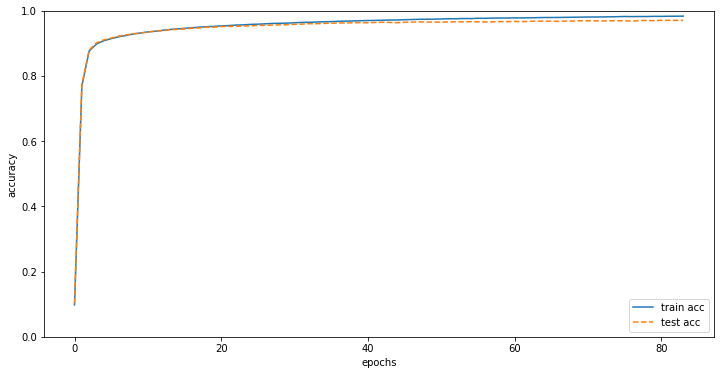

In [35]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6 

# Accuracy 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

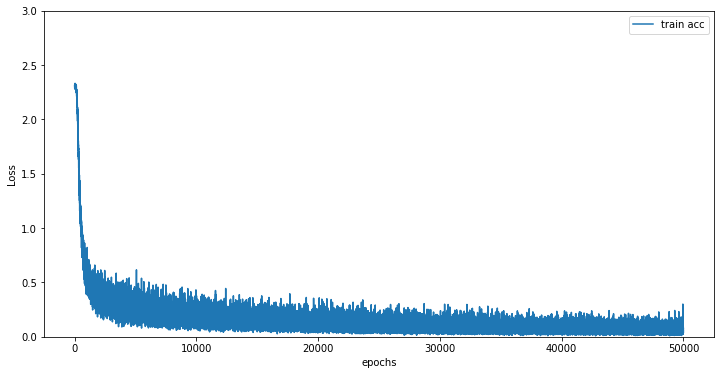

In [36]:
# Loss 그래프 그리기
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.ylim(0, 3.0)
plt.legend(loc='best')
plt.show()